In [32]:
import random
import math
import time
import numpy as np
import matplotlib.pyplot as plt

class SkipListNode:
    def __init__(self, key, value, level):
        self.key = key
        self.value = value
        self.forward = [None] * (level + 1)  # Array of forward pointers

class SkipList:
    def __init__(self, max_level=16, p=0.5):
        self.max_level = max_level
        self.p = p
        self.header = SkipListNode(-1, None, max_level)
        self.current_level = 0
        
        # Counters for experimental analysis
        self.search_operations = 0
        self.insert_operations = 0
        self.comparisons = 0
        
    def random_level(self):
        """Generate random level using geometric distribution"""
        level = 0
        while random.random() < self.p and level < self.max_level:
            level += 1
        return level
    
    def search(self, key, count_operations=True):
        """Search for a key and count operations"""
        if count_operations:
            self.search_operations = 0
            self.comparisons = 0
        
        current = self.header
        
        # Start from highest level and go down
        for level in range(self.current_level, -1, -1):
            # Move forward at current level
            while (current.forward[level] and 
                   current.forward[level].key < key):
                current = current.forward[level]
                if count_operations:
                    self.search_operations += 1
                    self.comparisons += 1
        
        # Move to next node at level 0
        current = current.forward[0]
        if count_operations:
            self.search_operations += 1
            self.comparisons += 1
        
        if current and current.key == key:
            return current.value, self.search_operations if count_operations else 0
        return None, self.search_operations if count_operations else 0
    
    def insert(self, key, value):
        """Insert a key-value pair"""
        update = [None] * (self.max_level + 1)
        current = self.header
        
        # Find position to insert
        for level in range(self.current_level, -1, -1):
            while (current.forward[level] and 
                   current.forward[level].key < key):
                current = current.forward[level]
            update[level] = current
        
        current = current.forward[0]
        
        if current and current.key == key:
            current.value = value  # Update existing
        else:
            # Generate random level for new node
            new_level = self.random_level()
            
            if new_level > self.current_level:
                for level in range(self.current_level + 1, new_level + 1):
                    update[level] = self.header
                self.current_level = new_level
            
            # Create and insert new node
            new_node = SkipListNode(key, value, new_level)
            for level in range(new_level + 1):
                new_node.forward[level] = update[level].forward[level]
                update[level].forward[level] = new_node
    
    def display(self):
        """Display the skip list structure"""
        print("\nSkip List Structure:")
        for level in range(self.current_level, -1, -1):
            print(f"Level {level}: ", end="")
            node = self.header.forward[level]
            while node:
                print(f"{node.key} ", end="")
                node = node.forward[level]
            print()

print("✅ Block 1: Classes defined successfully!")

✅ Block 1: Classes defined successfully!


In [33]:
def chebyshev_bound(r_values, expected_cost, variance):
    """Classic Chebyshev bound: Var(X) / ((r-1)*E[X])^2"""
    bounds = []
    
    for r in r_values:
        if r <= 1 or variance <= 0 or expected_cost <= 0:
            bounds.append(1.0)
        else:
            # P(X > r*E[X]) ≤ Var(X) / ((r-1)*E[X])^2
            excess = (r - 1) * expected_cost
            bound = variance / (excess ** 2)
            bounds.append(min(bound, 1.0))
    
    return bounds

print("✅ Block 2: Helper functions defined successfully!")

✅ Block 2: Helper functions defined successfully!


In [34]:
class SkipListExperiment:
    def __init__(self):
        self.results = {
            'theoretical_expected': [],
            'empirical_costs': [],
            'search_times': [],
            'parameters': []
        }
    
    def theoretical_expected_cost(self, n, p):
        """Calculate theoretical expected search cost"""
        if n <= 1:
            return 1.0
        L_n = math.log(n) / math.log(1/p)  # log_{1/p}(n)
        return L_n / p + 1 / (1 - p)
    
    def theoretical_variance(self, n, p):
        """Calculate theoretical variance"""
        if n <= 1:
            return 0.0
        L_n = math.log(n) / math.log(1/p)
        term1 = (1 - p) * L_n / (p ** 2)
        term2 = p / ((1 - p) ** 2)
        term3 = (2 * p - 1) / (p ** 2)
        return term1 + term2 + term3
    
    def generate_random_data(self, n, seed=42):
        """Generate random array for testing"""
        random.seed(seed)
        return sorted(random.sample(range(1, n * 10), n))

print("✅ Block 3: Experiment class core methods defined!")

✅ Block 3: Experiment class core methods defined!


In [35]:
def run_single_experiment(self, n, p, num_searches=1000):
    """Run experiment for given parameters"""
    print(f"\n=== Experiment: n={n}, p={p} ===")
    
    # Create skip list and insert data
    skip_list = SkipList(max_level=20, p=p)
    data = self.generate_random_data(n)
    
    print(f"Inserting {n} elements...")
    start_time = time.time()
    for i, key in enumerate(data):
        skip_list.insert(key, f"value_{key}")
    insert_time = time.time() - start_time
    print(f"Insert time: {insert_time:.4f}s")
    
    # Theoretical calculations
    theoretical_expected = self.theoretical_expected_cost(n, p)
    theoretical_variance = self.theoretical_variance(n, p)
    
    print(f"Theoretical E[X]: {theoretical_expected:.3f}")
    print(f"Theoretical Var[X]: {theoretical_variance:.3f}")
    
    # Perform searches and collect statistics
    search_costs = []
    search_times = []
    successful_searches = 0
    
    print(f"Performing {num_searches} searches...")
    
    for i in range(num_searches):
        # Mix of successful and unsuccessful searches
        if i % 2 == 0:  # Search for existing key
            search_key = random.choice(data)
        else:  # Search for non-existing key  
            search_key = random.randint(1, n * 10)
            while search_key in data:
                search_key = random.randint(1, n * 10)
        
        start_time = time.time()
        result, operations = skip_list.search(search_key, count_operations=True)
        search_time = time.time() - start_time
        
        search_costs.append(operations)
        search_times.append(search_time * 1000)  # Convert to milliseconds
        
        if result is not None:
            successful_searches += 1
    
    # Statistical analysis
    empirical_mean = np.mean(search_costs)
    empirical_var = np.var(search_costs)
    empirical_std = np.std(search_costs)
    
    print(f"\n--- Results ---")
    print(f"Successful searches: {successful_searches}/{num_searches}")
    print(f"Empirical E[X]: {empirical_mean:.3f}")
    print(f"Empirical Var[X]: {empirical_var:.3f}")
    print(f"Empirical Std[X]: {empirical_std:.3f}")
    print(f"Average search time: {np.mean(search_times):.3f}ms")
    
    # Comparison with theory
    error_mean = abs(empirical_mean - theoretical_expected) / theoretical_expected * 100
    error_var = abs(empirical_var - theoretical_variance) / theoretical_variance * 100 if theoretical_variance > 0 else 0
    
    print(f"\n--- Theory vs Empirical ---")
    print(f"Mean error: {error_mean:.2f}%")
    print(f"Variance error: {error_var:.2f}%")
    
    # Ratio analysis
    ratios = [cost / empirical_mean for cost in search_costs if empirical_mean > 0]
    
    return {
        'n': n,
        'p': p,
        'theoretical_expected': theoretical_expected,
        'theoretical_variance': theoretical_variance,
        'empirical_mean': empirical_mean,
        'empirical_variance': empirical_var,
        'search_costs': search_costs,
        'search_times': search_times,
        'ratios': ratios,
        'error_mean': error_mean,
        'error_var': error_var
    }

# Add method to class
SkipListExperiment.run_single_experiment = run_single_experiment
print("✅ Block 4: Single experiment method added!")

✅ Block 4: Single experiment method added!


In [36]:
def analyze_tail_behavior(self, results):
    """Analyze tail behavior with Chebyshev bounds"""
    ratios = results['ratios']
    empirical_mean = results['empirical_mean']
    theoretical_var = results['theoretical_variance']
    empirical_var = results['empirical_variance']
    
    # Calculate empirical tail probabilities
    r_values = np.arange(1.0, 4.1, 0.1)  # Extended range for Chebyshev
    empirical_probs = []
    
    for r in r_values:
        count = sum(1 for ratio in ratios if ratio > r)
        prob = count / len(ratios) if len(ratios) > 0 else 0
        empirical_probs.append(max(prob, 1e-10))  # Avoid log(0)
    
    # Calculate Chebyshev bounds using both theoretical and empirical variance
    chebyshev_theoretical = chebyshev_bound(r_values, empirical_mean, theoretical_var)
    chebyshev_empirical = chebyshev_bound(r_values, empirical_mean, empirical_var)
    
    return r_values, empirical_probs, chebyshev_theoretical, chebyshev_empirical

def validate_bounds(self, results):
    """Validate that Chebyshev bounds are indeed upper bounds"""
    print(f"\n{'='*60}")
    print("CHEBYSHEV BOUND VALIDATION ANALYSIS")
    print(f"{'='*60}")
    
    for result in results:
        r_vals, emp_probs, cheby_theoretical, cheby_empirical = self.analyze_tail_behavior(result)
        
        # Check if bounds are valid (empirical ≤ bound)
        theoretical_valid = all(emp <= bound for emp, bound in zip(emp_probs, cheby_theoretical))
        empirical_valid = all(emp <= bound for emp, bound in zip(emp_probs, cheby_empirical))
        
        # Calculate tightness (how close bound is to empirical)
        theoretical_tightness = np.mean([
            bound / (emp + 1e-10) for emp, bound in zip(emp_probs, cheby_theoretical) 
            if emp > 1e-9
        ])
        empirical_tightness = np.mean([
            bound / (emp + 1e-10) for emp, bound in zip(emp_probs, cheby_empirical) 
            if emp > 1e-9
        ])
        
        print(f"\nn={result['n']}, p={result['p']}:")
        print(f"  Chebyshev (Theoretical Var): Valid={theoretical_valid}, Avg Tightness={theoretical_tightness:.1f}x")
        print(f"  Chebyshev (Empirical Var):   Valid={empirical_valid}, Avg Tightness={empirical_tightness:.1f}x")
        
        # Find violations if any
        violations_theoretical = sum(1 for emp, bound in zip(emp_probs, cheby_theoretical) if emp > bound)
        violations_empirical = sum(1 for emp, bound in zip(emp_probs, cheby_empirical) if emp > bound)
        
        if violations_theoretical > 0:
            print(f"  ⚠️  Theoretical Chebyshev violations: {violations_theoretical}/{len(r_vals)}")
        if violations_empirical > 0:
            print(f"  ⚠️  Empirical Chebyshev violations: {violations_empirical}/{len(r_vals)}")

# Add methods to class
SkipListExperiment.analyze_tail_behavior = analyze_tail_behavior
SkipListExperiment.validate_bounds = validate_bounds
print("✅ Block 5: Analysis methods added!")

✅ Block 5: Analysis methods added!


In [37]:
def plot_results(self, all_results):
    """Create comprehensive plots with Chebyshev bounds"""
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))
    
    # Plot 1: Theoretical vs Empirical Expected Cost
    ax1 = axes[0]
    n_values = [r['n'] for r in all_results]
    theoretical_means = [r['theoretical_expected'] for r in all_results]
    empirical_means = [r['empirical_mean'] for r in all_results]
    
    ax1.plot(n_values, theoretical_means, 'b-o', label='Theoretical E[X]', linewidth=2)
    ax1.plot(n_values, empirical_means, 'r-s', label='Empirical E[X]', linewidth=2)
    ax1.set_xlabel('n (number of elements)')
    ax1.set_ylabel('Expected Search Cost')
    ax1.set_title('Theoretical vs Empirical Expected Cost')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_xscale('log')
    
    # Plot 2: Cost Distribution for largest dataset
    ax2 = axes[1]
    largest_result = max(all_results, key=lambda x: x['n'])
    ax2.hist(largest_result['search_costs'], bins=50, alpha=0.7, density=True, 
            edgecolor='black', color='lightblue')
    ax2.axvline(largest_result['theoretical_expected'], color='blue', linestyle='--', 
               linewidth=2, label=f'Theoretical E[X]={largest_result["theoretical_expected"]:.2f}')
    ax2.axvline(largest_result['empirical_mean'], color='red', linestyle='--', 
               linewidth=2, label=f'Empirical E[X]={largest_result["empirical_mean"]:.2f}')
    ax2.set_xlabel('Search Cost')
    ax2.set_ylabel('Density')
    ax2.set_title(f'Cost Distribution (n={largest_result["n"]}, p={largest_result["p"]})')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Tail Probability Analysis with Chebyshev
    ax3 = axes[2]
    r_vals, emp_probs, cheby_theoretical, cheby_empirical = self.analyze_tail_behavior(largest_result)
    
    ax3.semilogy(r_vals, emp_probs, 'ro-', label='Empirical P(X > r·E[X])', 
                markersize=5, linewidth=2)
    ax3.semilogy(r_vals, cheby_theoretical, 'b-', label='Chebyshev (Theoretical Var)', 
                linewidth=3, alpha=0.8)
    ax3.semilogy(r_vals, cheby_empirical, 'g--', label='Chebyshev (Empirical Var)', 
                linewidth=2, alpha=0.8)
    
    ax3.set_xlabel('r (ratio)')
    ax3.set_ylabel('Probability')
    ax3.set_title('Tail Probability: Empirical vs Chebyshev Bounds')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(1e-9, 1)

    plt.tight_layout()
    plt.show()

# Add method to class
SkipListExperiment.plot_results = plot_results
print("✅ Block 6: Original plotting method added!")

✅ Block 6: Original plotting method added!


In [38]:
def run_comprehensive_experiment(self):
    """Run comprehensive experiment with multiple configurations"""
    configs = [
        (256, 0.25),
        (256, 0.5),
        (1024, 0.25), 
        (1024, 0.5),
        (4096, 0.25),
        (4096, 0.5),
        (8192, 0.5),
        (16384, 0.5),
        (32768, 0.5),
        (65536, 0.5)
    ]

    all_results = []

    print("=== SKIP LIST EXPERIMENTAL ANALYSIS WITH CHEBYSHEV BOUNDS ===")
    print(f"User: xnpham")
    
    for n, p in configs:
        result = self.run_single_experiment(n, p, num_searches=50000)
        all_results.append(result)
        
        # Show some example searches for smallest dataset
        if n == 256 and p == 0.5:
            print(f"\n--- Example Search Costs (first 20) ---")
            costs = result['search_costs'][:20]
            print(f"Costs: {costs}")
            print(f"Ratios: {[f'{c/result['empirical_mean']:.2f}' for c in costs]}")
    
    # Summary table
    print(f"\n{'='*90}")
    print("SUMMARY TABLE")
    print(f"{'='*90}")
    print(f"{'n':>6} {'p':>5} {'Theory E[X]':>12} {'Empirical E[X]':>15} {'Error %':>8} {'Theory Var':>10} {'Emp Var':>8}")
    print(f"{'-'*90}")
    
    for result in all_results:
        print(f"{result['n']:>6} {result['p']:>5.2f} {result['theoretical_expected']:>12.3f} "
              f"{result['empirical_mean']:>15.3f} {result['error_mean']:>8.2f} "
              f"{result['theoretical_variance']:>10.3f} {result['empirical_variance']:>8.3f}")
    
    # Validate bounds
    self.validate_bounds(all_results)
    
    return all_results

# Add method to class
SkipListExperiment.run_comprehensive_experiment = run_comprehensive_experiment
print("✅ Block 8: Main experiment runner added!")

✅ Block 8: Main experiment runner added!


In [39]:
# Create experiment instance and run
experiment = SkipListExperiment()
print("Starting comprehensive experiment...")
results = experiment.run_comprehensive_experiment()

print(f"\n{'='*60}")
print("EXPERIMENTS COMPLETED!")
print(f"Total configurations tested: {len(results)}")
print("✅ All experiments finished successfully!")
print(f"{'='*60}")

Starting comprehensive experiment...
=== SKIP LIST EXPERIMENTAL ANALYSIS WITH CHEBYSHEV BOUNDS ===
User: xnpham

=== Experiment: n=256, p=0.25 ===
Inserting 256 elements...
Insert time: 0.0006s
Theoretical E[X]: 17.333
Theoretical Var[X]: 40.444
Performing 50000 searches...

--- Results ---
Successful searches: 25000/50000
Empirical E[X]: 8.076
Empirical Var[X]: 13.016
Empirical Std[X]: 3.608
Average search time: 0.002ms

--- Theory vs Empirical ---
Mean error: 53.41%
Variance error: 67.82%

=== Experiment: n=256, p=0.5 ===
Inserting 256 elements...
Insert time: 0.0004s
Theoretical E[X]: 18.000
Theoretical Var[X]: 18.000
Performing 50000 searches...

--- Results ---
Successful searches: 25000/50000
Empirical E[X]: 7.187
Empirical Var[X]: 9.183
Empirical Std[X]: 3.030
Average search time: 0.002ms

--- Theory vs Empirical ---
Mean error: 60.07%
Variance error: 48.98%

--- Example Search Costs (first 20) ---
Costs: [3, 18, 6, 4, 7, 5, 9, 5, 6, 15, 6, 11, 6, 8, 6, 6, 6, 4, 5, 9]
Ratios: ['

Generating original plots...


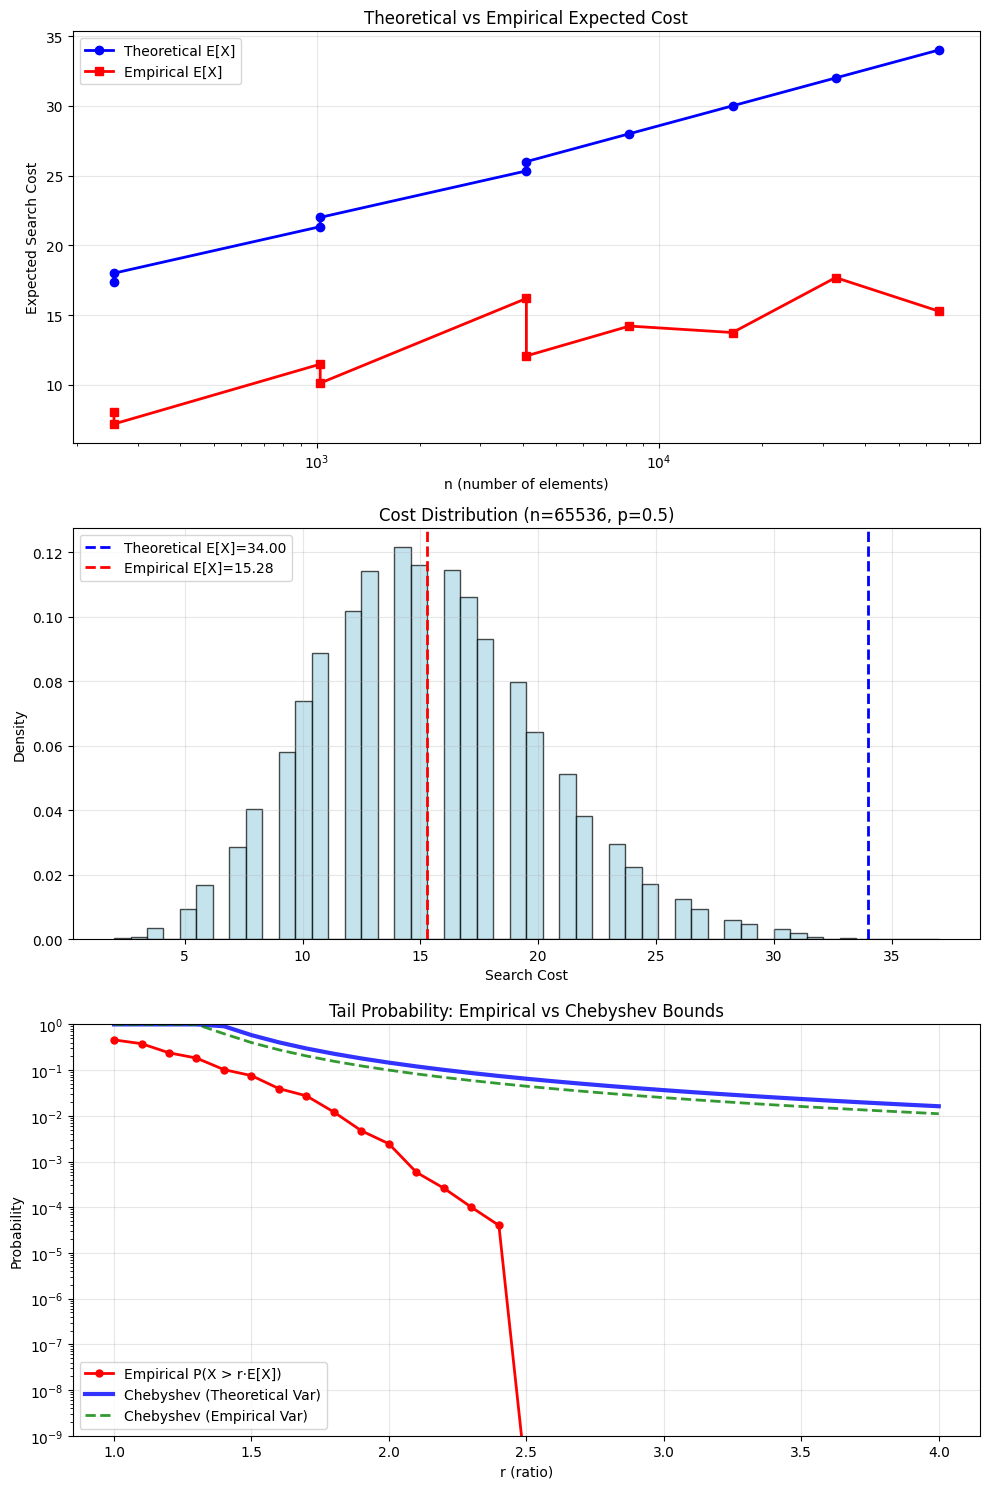

✅ Original plots generated!


In [40]:
# Generate the original 3-panel plot
print("Generating original plots...")
experiment.plot_results(results)
print("✅ Original plots generated!")